<a href="https://colab.research.google.com/github/thinh2904/BT_Tong_Hop/blob/main/thuc_hanh_02_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import os

actions = {
    "F":(0,  1),
    "B":(0 , -1),
    "L": (-1 , 0),
    "R": (1 ,  0)
}
acts = [(0,1), (0,-1), (1, 0), (-1,0) ]

In [ ]:
class Game:
  def __init__(self, num_rows = 3, num_cols = 4, wall1 = (1,1),wall2 = (2,3), goal = (0,3)):
    self.num_rows = num_rows
    self.num_cols = num_cols
    self.grid = np.zeros((num_rows, num_cols))
    self.grid[wall1[0],wall1[1]] = -100.0
    self.grid[goal[0], goal[1]] = 1.0
    self.grid[wall2[0], wall2[1]] = -100.0
    self.car = [0,0]
  def observation(self):
    return self.grid

  def get_cur_state(self):
    return self.car



  def render(self):
    for i in range(self.num_rows+1):
       plt.plot([0, self.num_cols], [i, i], color="black")

    for j in range(self.num_cols+1):
       plt.plot([j, j], [0, self.num_rows], color="black")
    plt.plot(self.car[0]+0.5,self.car[1]+0.5, marker="*", markersize = 35, color="blue")
    plt.plot(3.5,2.5, marker="P", markersize = 30, color="green")
    plt.plot(3.5,0.5, marker="X", markersize = 30, color="red")
    plt.plot(1.5,1.5, marker="X", markersize = 30, color="red")


  def get_rd_action(self,num_actions = [0,1,2,3]):
    return np.random.choice(num_actions)

  def get_action_by_q(self, Q_table, _state):
    return np.max(Q_table.where(Q_table[_state,:]))


  def move(self, _action):
    def check_action(_action):
      rs = False
      if self.car[0] + _action[0] >= self.num_rows or self.car[0] + _action[0] < 0:
        rs = True
      if self.car[1] + _action[1] >= self.num_cols or self.car[1] + _action[1] < 0:
        rs = True
      return rs
    old_state = self.car
    next_state = None
    reward = 0.0
    done = True
    if check_action(_action):
      done = True
      reward = -1.0
    else:
      self.car[0] = self.car[0] + _action[0]
      self.car[1] = self.car[1] + _action[1]
      next_state = self.car
      if self.car[0] == 3 and self.car[1] == 2:
        reward = 1.0
        done = True
      elif self.car[0] == 3 and self.car[1] == 1:
        reward = -1.0
        done= True
      else:
        reward = 0.0
        done =False
    return old_state, _action, reward, next_state, done

  def reset(self):
    self.car[0] = 0.0
    self.car[1] = 0.0



In [ ]:
num_rows = 3
num_cols = 4
stas = []
for i in range(num_rows):
  for j in range(num_cols):
    stas.append([i,j])

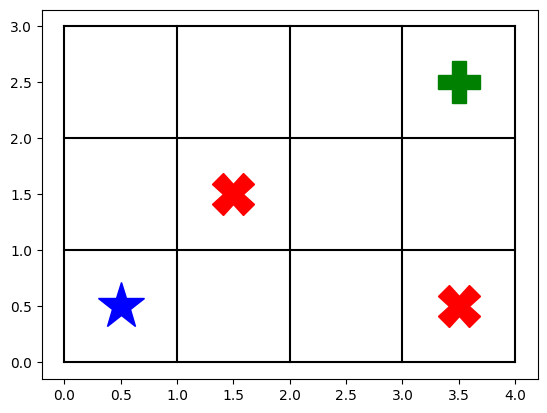

In [ ]:
done = False
Q = np.zeros((len(stas), len(acts)))
G = Game()
G.observation()
G.render()

In [ ]:
done = False
Q = np.zeros((len(stas), len(acts)))
G = Game()
G.reset()
num_games = 10000


In [ ]:
for t in range(num_games):
  done = False
  G.reset()
  while not done:
    action = G.get_rd_action(num_actions = [0,1,2,3])
    _state, action, reward, state_, done = G.move(acts[action])
    # print(_state, acts.index(action), reward, state_, done)
    discount = 0.0
    if state_ is not None:
      discount = 0.9*np.max(Q[stas.index(state_), :])
    else:
      discount = 0.0

    Q[stas.index(_state), action] = reward + discount

In [ ]:
print(stas)
Q

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3]]


array([[-1.,  0.,  0., -1.],
       [-1.,  0.,  0., -1.],
       [ 0.,  0.,  0., -1.],
       [-1.,  0.,  0., -1.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-1.,  0.,  0., -1.],
       [-1., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-1., -1.,  0.,  0.]])